<a href="https://colab.research.google.com/github/ayushmangupta/TF2/blob/master/TF2Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

#!pip install tensorflow-gpu==2.0.0-beta1
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
print(tf.__version__)

2.0.0-beta1


In [0]:
class Model(tfk.Model):
  def __init__(self):
    super(Model,self).__init__()
    self.common_layers=[]
    self.common_layers.append(tfkl.Conv2D(64,3,strides=(1,1),padding='same',activation="relu",input_shape=(28,28,1)))
    self.common_layers.append(tfkl.Conv2D(64,3,strides=(1,1),padding='same',activation="relu"))
    self.common_layers.append(tfkl.MaxPool2D((2,2),(2,2)))
    self.common_layers.append(tfkl.Flatten())
    self.common_layers.append(tfkl.Dense(128,activation="relu"))
    self.common_layers.append(tfkl.Dense(64,activation="relu"))
    self.common_layers.append(tfkl.Dense(10,activation="softmax"))
                              
  def call(self,x):
    #x= tf.convert_to_tensor(x,dtype=tf.float32)
    for layer in self.common_layers:
      x = layer(x)
    return x
          
                              
                         
   

In [0]:
model = Model()

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


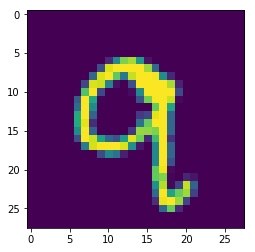

In [5]:
mnist = tfds.load('mnist',split=tfds.Split.TRAIN)
img, = mnist.take(1)
img = img["image"].numpy()
plt.imshow(img[:,:,0])

In [0]:
loss_object = tf.keras.losses.C()

optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)


In [0]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


Epoch 1, Loss: 0.1197001039981842, Accuracy: 96.3516616821289, Test Loss: 0.05510297417640686, Test Accuracy: 98.32999420166016
Epoch 2, Loss: 0.07957190275192261, Accuracy: 97.54666900634766, Test Loss: 0.04935252666473389, Test Accuracy: 98.44999694824219
Epoch 3, Loss: 0.06115313991904259, Accuracy: 98.10055541992188, Test Loss: 0.0486515648663044, Test Accuracy: 98.50999450683594
Epoch 4, Loss: 0.05041302740573883, Accuracy: 98.42124938964844, Test Loss: 0.0475187674164772, Test Accuracy: 98.56999969482422
